# Assignment 2: recommender System

## Code from the lecture

In [51]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [53]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [55]:
epsilon=0.0000001
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b) + epsilon)

In [56]:
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

In [186]:
def getTopN(movie_id,D,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title,D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


## Lösung Aufgabe 4.1

In [58]:
#Methode Eucledian Distance

def EucledianDist(a,b):
    return np.linalg.norm(b-a)

In [59]:
#Matrix Eucledian Distance Deuc erzeugen

Deuc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            Deuc[i,j]=EucledianDist(R[:,i],R[:,j])

In [65]:
#Anfrage auf Datensatz D
CII("Star",D)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [66]:
#Anfrage auf Datensatz Deuc (Euclidische Berechnung)
CII("Star",Deuc)

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [194]:
#Testdaten D_train mit R_train und R_test

from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)

D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])

In [68]:
#Testdaten Deuc_train mit R_train und R_test

#from sklearn.model_selection import train_test_split
#R_train, R_test = train_test_split(R, test_size=0.1)

Deuc_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            Deuc_train[i,j]=EucledianDist(R_train[:,i],R_train[:,j])

In [69]:
#Anfrage auf Testdatensatz D_train
CII("Star",D_train)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
120      Independence Day (ID4) (1996)
Name: title, dtype: object

In [70]:
#Anfrage auf Testdatensatz Deuc_train
CII("Star",Deuc_train)

recommending movies for: 'Star Wars (1977)'


989                 Anna Karenina (1997)
1061       Four Days in September (1997)
937           Smile Like Yours, A (1997)
1242                  Night Flier (1997)
1293    Ayn Rand: A Sense of Life (1997)
Name: title, dtype: object

In [187]:
#Mean Squard Error Cosinus
test_resD=test_Score(D_train,R_test)
error_Cosinus = np.mean(test_resD)
print("Mean Squared Error der Cosinus-Distanz: ",error_Cosinus)

Mean Squared Error der Cosinus-Distanz:  2.1991578947368424


(array([ 2.,  5.,  8., 13., 15., 12.,  7., 14., 12.,  7.]),
 array([0.   , 0.396, 0.792, 1.188, 1.584, 1.98 , 2.376, 2.772, 3.168,
        3.564, 3.96 ]),
 <BarContainer object of 10 artists>)

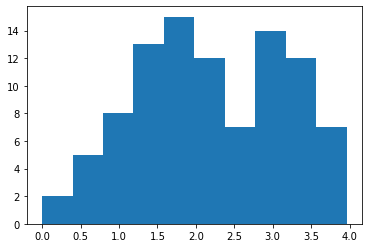

In [76]:
plt.hist(test_resD)

In [197]:
#Mean Squard Error Euclidisan
test_resDeuc=test_Score(Deuc_train,R_test)
error_Eucl = np.mean(test_resDeuc)
print("Mean Squared Error der Euclidischen-Distanz: ",error_Eucl)

Mean Squared Error der Euclidischen-Distanz:  1.402947368421053


(array([15.,  9., 16., 10., 18., 11., 11.,  3.,  1.,  1.]),
 array([0.  , 0.46, 0.92, 1.38, 1.84, 2.3 , 2.76, 3.22, 3.68, 4.14, 4.6 ]),
 <BarContainer object of 10 artists>)

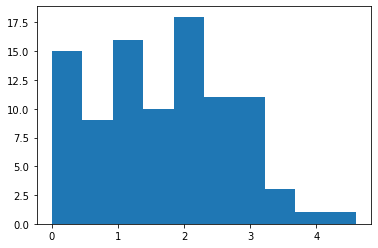

In [75]:
plt.hist(test_resDeuc)

## Lösung Aufgabe 4.2

In [252]:
#Fünf zufällige Filme
def get_ZufallID_Movie(movies):
    return np.random.randint(1,movies.shape[0])

def get_Random_MovieIDs(movies,N=5):
    randomIDs = np.zeros(N, dtype=int)
    for i in range(N):
        randomIDs[i] = get_ZufallID_Movie(movies)
    return randomIDs

#Methode zur Berechnung der durchschnittlichen Bewertungen
def Average_Movie_Ratings(rating):
    #Array definieren
    movieRating= np.zeros((rating.values[:,1].max()-1, 2))
    movie_id = ratings.values[:,1:3]
    for i in range(rating.values[:,1].max()):
        mask = (movie_id[:,0] == i)
        if movie_id[mask].shape[0] != 0:
            tempRating = movie_id[mask]
            movieRating[i-1]= (int(i),np.mean(tempRating[:,1]))
    return movieRating

def getTopN_Average_Movie(ratings, N=5):    
    return np.argsort(Average_Movie_Ratings(ratings), axis=0)[-N:,1]
    
def Score_byID_R(ID,movieIDs, Test):
    res_id = movieIDs[::-1]
    res_title = getNameByID(movieIDs)[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score_R(movieIDs,R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_R(e, movieIDs, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

TopNIDs = getTopN_Average_Movie(ratings)
RandomIDs = get_Random_MovieIDs(movies)

In [253]:
#Random Filme IDs
RandomIDs

array([ 308, 1006,  846, 1193,  594])

In [254]:
#Top 5 Filme IDs
TopNIDs

array([1200, 1535, 1652, 1598, 1292], dtype=int64)

In [255]:
#Mean Squard Error Top 5
test_TopN=test_Score_R(TopNIDs,R_test)
error_test_TopN = np.mean(test_TopN)
print("Mean Squared Error für die Top 5 Filme: ", error_test_TopN)

Mean Squared Error für die Top 5 Filme:  0.021052631578947368


(array([93.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

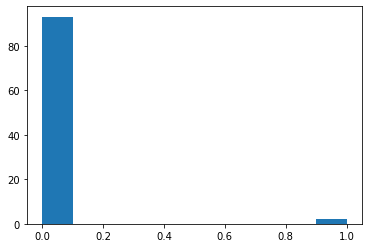

In [256]:
plt.hist(test_TopN)

In [259]:
#Mean Squard Error Random
test_Random=test_Score_R(RandomIDs,R_test)
error_test_Random = np.mean(test_Random)
print("Mean Squared Error für 5 random Filme: ", error_test_Random)

Mean Squared Error für 5 random Filme:  0.1726315789473684


(array([75.,  1.,  0.,  7.,  0.,  5.,  4.,  2.,  0.,  1.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ]),
 <BarContainer object of 10 artists>)

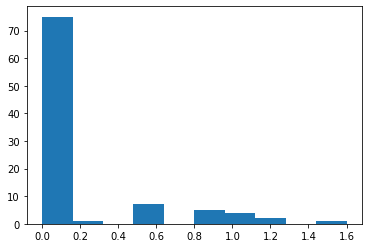

In [258]:
plt.hist(test_Random)

## Lösung Aufgabe 4.3

In [260]:
#Sigulärwertzwerlegung

#D anzeigen
D

array([[0.        , 0.40238218, 0.33024479, ..., 0.        , 0.04718307,
        0.04718307],
       [0.40238218, 0.        , 0.27306918, ..., 0.        , 0.07829936,
        0.07829936],
       [0.33024479, 0.27306918, 0.        , ..., 0.        , 0.        ,
        0.09687505],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.09687505, ..., 0.        , 0.        ,
        0.        ]])

In [261]:
U,S,V = np.linalg.svd(D)

In [262]:
#U anzeigen
U

array([[-0.04732606, -0.01485397,  0.01710692, ...,  0.03320633,
         0.07709852,  0.02683127],
       [-0.0442046 , -0.02817456, -0.00874025, ..., -0.01037844,
         0.02276745,  0.01173597],
       [-0.03099178, -0.01538773, -0.00099615, ...,  0.01075306,
         0.03056101, -0.02053747],
       ...,
       [-0.00086959,  0.00484583, -0.00268401, ...,  0.00168333,
         0.00644098, -0.00680988],
       [-0.00516609, -0.00164718,  0.00114115, ...,  0.01203374,
         0.01327531, -0.00629676],
       [-0.00501757,  0.00051215,  0.00370972, ...,  0.0316123 ,
         0.00433746, -0.01458175]])

In [263]:
#S anzeigen
S

array([1.92975815e+02, 5.07954112e+01, 4.48492793e+01, ...,
       4.84719784e-03, 3.25223840e-03, 8.77128853e-05])

In [264]:
#V anzeigen
V

array([[-0.04732606, -0.0442046 , -0.03099178, ..., -0.00086959,
        -0.00516609, -0.00501757],
       [-0.01485397, -0.02817456, -0.01538773, ...,  0.00484583,
        -0.00164718,  0.00051215],
       [ 0.01710692, -0.00874025, -0.00099615, ..., -0.00268401,
         0.00114115,  0.00370972],
       ...,
       [-0.03320633,  0.01037844, -0.01075306, ..., -0.00168333,
        -0.01203374, -0.0316123 ],
       [ 0.07709852,  0.02276745,  0.03056101, ...,  0.00644098,
         0.01327531,  0.00433746],
       [-0.02683127, -0.01173597,  0.02053747, ...,  0.00680988,
         0.00629676,  0.01458175]])

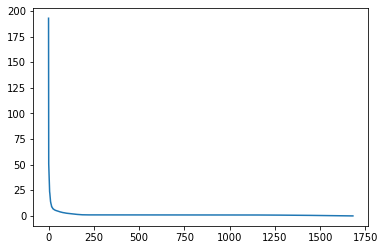

In [265]:
plt.plot(S)

(array([1.673e+03, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([8.77128853e-05, 1.92976604e+01, 3.85952332e+01, 5.78928059e+01,
        7.71903786e+01, 9.64879513e+01, 1.15785524e+02, 1.35083097e+02,
        1.54380669e+02, 1.73678242e+02, 1.92975815e+02]),
 <BarContainer object of 10 artists>)

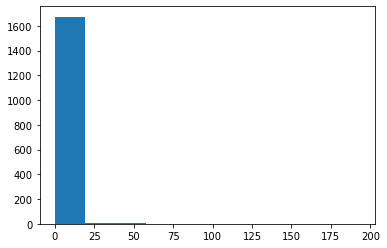

In [266]:
plt.hist(S)

In [267]:
#Reconstruct True / False?

np.allclose(D,np.dot(U * S ,V))

True

In [268]:
cut=80
D_Slice = np.dot(U[:,:cut] * S[:cut] ,V[:cut,:])

In [270]:
#Mean Squard Error D_Slice
test_D_Sclice=test_Score(D_Slice,R_test)
error_D_Slice = np.mean(test_D_Sclice)
print("Mean Squared Error der Euclidischen-Distanz: ",error_D_Slice)

Mean Squared Error der Euclidischen-Distanz:  2.9410526315789483
